In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the Boston Housing dataset from a CSV file
boston_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
                        header=None,
                        delim_whitespace=True,
                        names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                               'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])

In [3]:
# Extract X and y matrices from the dataset
X = boston_df.drop('MEDV', axis=1).values
y = boston_df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [4]:
# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# number of rows
n = X_train.shape[0]
# number of columns
d = X_train.shape[1]

# Join X_train and y_train
train_data = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)

# number of epochs
T = 10

In [5]:
def create_random_batches(dataset, batch_size = 32):
    # num_samples = len(dataset)
    num_samples = n
    batches = []
    num_batches = num_samples // batch_size  # Calculate the number of batches based on dataset size

    for _ in range(num_batches):
        random_rows = np.random.choice(num_samples, size=batch_size, replace=False)
        batch = dataset[random_rows]
        batches.append(batch)
    return batches


# Create batches only for the training set
train_random_batches = create_random_batches(train_data)

In [6]:
def stochastic_gradient_descent(batches, learning_rate=0.001, num_iterations=T):

    # Initialize model parameters
    num_features = d
    weights = np.zeros(num_features)  # Initialize weights to zeros
    bias = 0  # Initialize bias to zero
    # Initialize a list to store MSE values
    mse_values = []

    # Perform gradient descent
    for iteration in range(num_iterations):
        for batch in batches:
            # Extract features and target from the current batch
            X_batch = batch[:, :-1]
            y_batch = batch[:, -1]

            # Perform gradient descent on the current batch using the features X_batch and target y_batch
            num_samples = X_batch.shape[0]

            # Compute predictions
            y_pred = np.dot(X_batch, weights) + bias

            # Compute gradients
            d_weights = (1 / num_samples) * np.dot(X_batch.T, (y_pred - y_batch))
            d_bias = (1 / num_samples) * np.sum(y_pred - y_batch)

            # Update model parameters
            weights -= learning_rate * d_weights
            bias -= learning_rate * d_bias

            # Calculate MSE and append it to the list
            mse = np.mean((np.dot(X_test, weights) + bias - y_test) ** 2)
            mse_values.append(mse)

    # Return the updated model parameters and MSE values
    return weights, bias, mse_values

# Call the stochastic_gradient_descent function and obtain the trained model parameters
weights, bias, mse_values = stochastic_gradient_descent(train_random_batches)

In [7]:
# Make predictions on the test set using the trained model parameters
y_pred_test = np.dot(X_test, weights) + bias

# Calculate mean squared error
mse = np.mean((y_pred_test - y_test) ** 2)
print("Mean Squared Error (MSE) on Test Set:", mse)

Mean Squared Error (MSE) on Test Set: 446.68416947035695


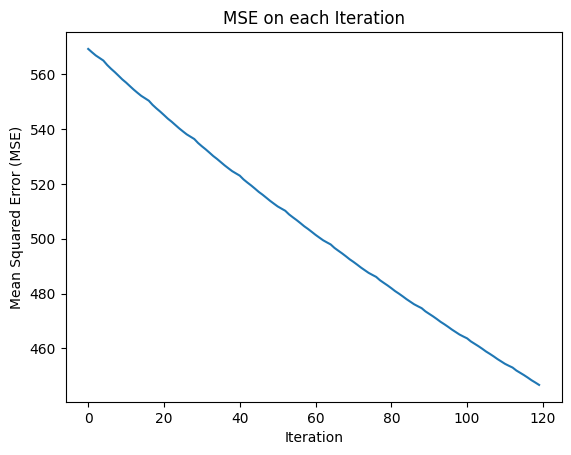

In [8]:
# Create a graph of MSE values
plt.plot(range(len(mse_values)), mse_values)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE on each Iteration")
plt.show()